Modify the scratch code of K-means clustering in our lecture:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class

Mini-Batch will rarely converge, thus it is important to add a max_iteration or some tolerance.  Last, theoretically speaking, Mini-Batch will never perform better in terms of accuracy when compare to K-means, but it is very close to optimal but will almost always beat K-means in terms of time given large dataset and a modest tolerance parameter.

In [11]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from time import time
import numpy as np
import matplotlib.pyplot as plt


In [12]:
X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

In [26]:
class Mini_KMeans:
    def  __init__(self,k,minibatch=False,max_iter=100):
        self.minibatch = minibatch
        self.max_iter = max_iter
        self.k = k
    def fit(self,X):
        self.center = self.kmeans(X, n_clusters=self.k)
    
    def preds(self,X):
        preds = self.predict(X)
        return preds


    def kmeans(self,X, n_clusters):
        m, n = X.shape

        #1. randomly choose n clusters from X
        #you can also randomly generate any two points
        rng = np.random.RandomState(42)
        i = rng.permutation(m)[:n_clusters]
        centers = X[i]
        iteration = 0
        
        batch_size =100
                         
        for ix in np.arange(self.max_iter):
            if self.minibatch :
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                new_X = X[ix:ix+batch_size]
            else : 
                new_X = X
            #2. assign lables based on closest center
            #return the index of centers having smallest
            #distance with X
            labels = pairwise_distances_argmin(new_X, centers)

            #3. find new centers
            new_centers = []
            for i in range(n_clusters):
                new_centers.append(new_X[labels == i].mean(axis=0))

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)

            #plotting purpose
            #plot every 5th iteration to save space
            #remove this if, if you want to see each snapshot
            if (iteration % 5 == 0):
                pred = pairwise_distances_argmin(X, new_centers)
                plt.figure(figsize=(5, 2))
                plt.title(f"Iteration: {iteration}")
                plt.scatter(X[:, 0], X[:, 1], c=pred)
                plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

            #4 stopping criteria - if centers do not 
            #change anymore, we stop!
            if(np.allclose(centers, new_centers ,rtol=0.2)):
                break
            else:
                centers = new_centers
                iteration+=1

        print(f"Done in {iteration} iterations")
        total_with_variation_score = 0
        labels = pairwise_distances_argmin(X, centers) #<---Note I use X here.  Why?
        for i in range(n_clusters):
            cluster_mean = X[labels==i].mean(axis=0)
            total_with_variation_score += ((X[labels==i] - cluster_mean)** 2).sum()
            
        print("Total with variation score: ", total_with_variation_score)
        return centers
    
    


    def predict(self,X):
        return pairwise_distances_argmin(X, self.center)


Done in 1 iterations
Total with variation score:  3230.347486876175


Text(0.5, 1.0, 'Final result')

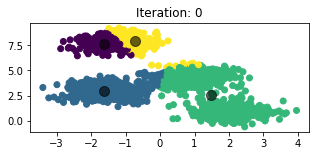

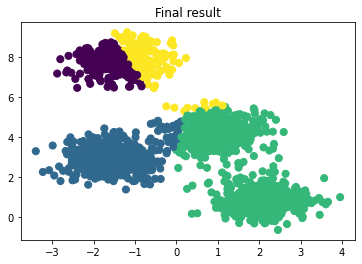

In [27]:

model = Mini_KMeans(k=4)
model.fit(X)
preds = model.preds(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

=====k = 2
Done in 3 iterations
Total with variation score:  5805.9557927316355
=====k = 3
Done in 8 iterations
Total with variation score:  2493.8460360964195
=====k = 4
Done in 1 iterations
Total with variation score:  3250.677905058833
=====k = 5
Done in 1 iterations
Total with variation score:  931.065702480407
=====k = 6
Done in 12 iterations
Total with variation score:  845.3185221474447


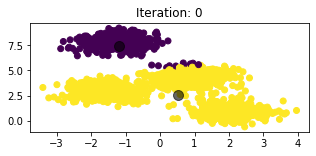

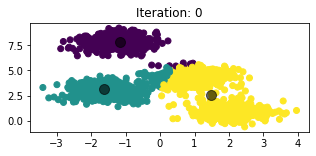

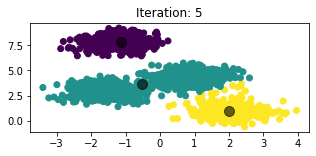

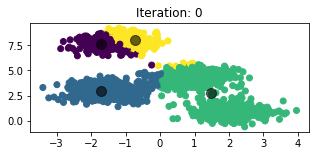

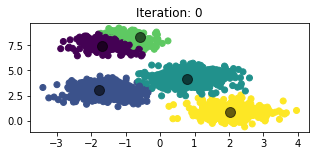

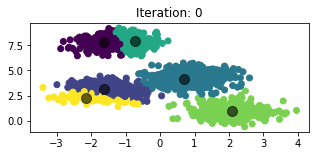

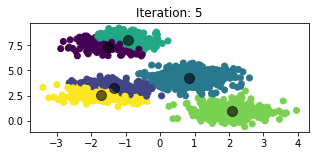

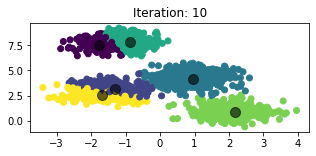

In [35]:
for k in range(2, 7):
    print(f"=====k = {k}")
    model = Mini_KMeans(k=k,minibatch=True)
    model.fit(X)
    preds = model.preds(X)